In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes
from matplotlib.backends.backend_pdf import PdfPages

# Сохранение картинок в PDF 
def save_image(filename):
        
        p = PdfPages(filename)
        fig_nums = plt.get_fignums()  
        figs = [plt.figure(n) for n in fig_nums]
        for fig in figs: 
            fig.savefig(p, format='pdf') 
        p.close()  

In [5]:
path = r'D:/ИТМО/Python/rozes/parsed_measurements/abs01__18-10-18.csv'                 # Добавить новый файл
data = pd.read_csv(path, sep=';',decimal=',') 
df = pd.DataFrame(data)
df1 = df.iloc[:,5:]
df1.columns = df1.columns.str.replace(' ', '_')
df1.columns = df1.columns.str[10:]
df1.columns = df1.columns.str[:-7]
df1.fillna(0, inplace=True)
df1.head()

,_2.0_m__Mod,_2.0_m__Dir,_4.0_m__Mod,_4.0_m__Dir,_6.0_m__Mod,_6.0_m__Dir,_8.0_m__Mod,_8.0_m__Dir,10.0_m__Mod,10.0_m__Dir,12.0_m__Mod,12.0_m__Dir,14.0_m__Mod,14.0_m__Dir,16.0_m__Mod,16.0_m__Dir,18.0_m__Mod,18.0_m__Dir,20.0_m__Mod,20.0_m__Dir
0,7.5,182.5,7.7,170.2,7.4,155.7,8.2,142.4,20.5,158.1,22.5,166.6,22.5,182.4,13.7,185.6,14.6,187.2,14.3,178.3
1,7.0,162.7,8.4,172.9,7.5,158.2,9.7,138.1,17.9,147.8,23.7,165.0,20.7,181.0,17.8,191.0,12.7,187.2,6.5,169.5
2,4.6,122.0,7.9,168.3,8.0,163.9,7.9,170.1,15.3,151.5,20.8,163.4,21.6,193.1,18.4,188.3,13.6,201.0,8.9,171.8
3,6.0,181.0,9.7,178.7,12.0,182.3,13.0,178.4,12.7,155.8,16.6,164.3,19.8,188.5,17.3,191.1,13.8,192.8,6.5,192.2
4,6.1,144.8,10.0,148.4,9.1,179.3,11.2,166.3,13.4,151.0,14.9,172.5,20.0,186.3,17.8,196.3,10.2,188.8,10.0,213.3


In [6]:
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step
# ПРИМЕРЫ для подстановки ниже
# Для abs01__18-10-18 start_prov = 2.0, stop_prov = df1.shape[1] + 2, step_prov = 2  
# Для abs01__19-10-13 start_prov = 0.3, stop_prov = df1.shape[1], step_prov = 2    
# Для abs06_1__18-10-11 start_prov = 1.5, stop_prov = df1.shape[1]//2 + 1, step_prov = 1
# Для abs10_1__19-10-10 start_prov = -0.4, stop_prov = df1.shape[1] -2, step_prov = 2

# Отдельно для abs10__18-10-15 в три этапа: 
# 1ый - start_prov = 1.1, stop_prov = 40, step_prov = 2 -> сохранить картинку и вручную переименовать в abs10__18-10-15(1)
# 2ой - start_prov = 41.2, stop_prov = 50, step_prov = 4 -> сохранить картинку и вручную переименовать в abs10__18-10-15(2)
# 3ий - start_prov = 43.1, stop_prov = 50, step_prov = 4 -> сохранить картинку и вручную переименовать в abs10__18-10-15(3)

start_prov = 2.0                            # поменять для каждой
stop_prov = df1.shape[1] + 2                  # поменять для каждой, проверять стоп 
step_prov = 2                               # поменять для каждой 
i_prov=drange(start_prov, stop_prov, step_prov)
["%g" % x for x in i_prov]                  #проверка drange на соответствие названий столбцов

['2', '4', '6', '8', '10', '12', '14', '16', '18', '20']

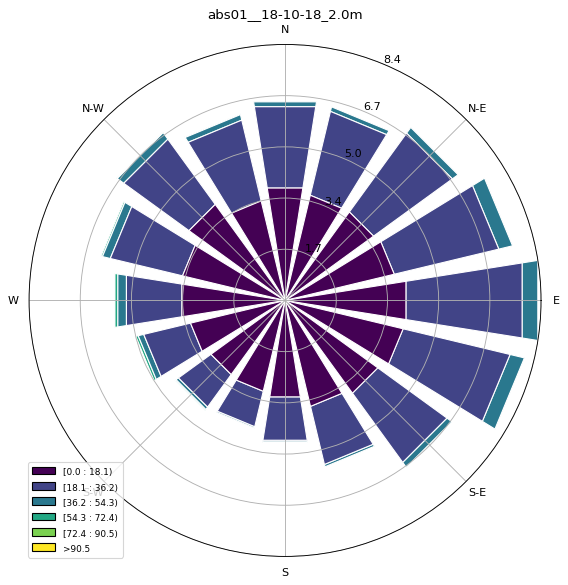

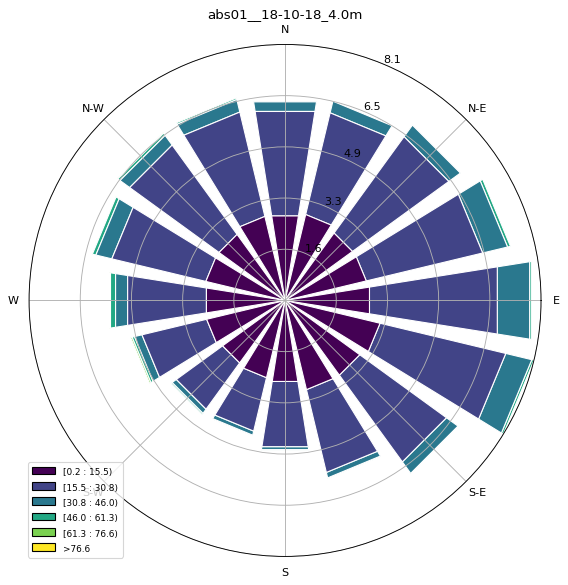

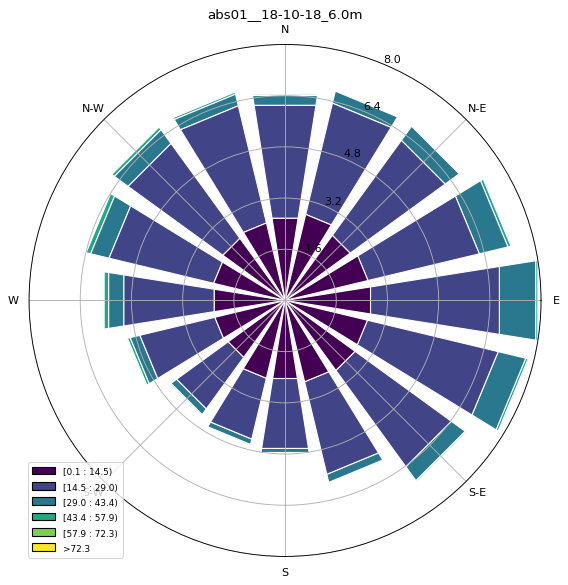

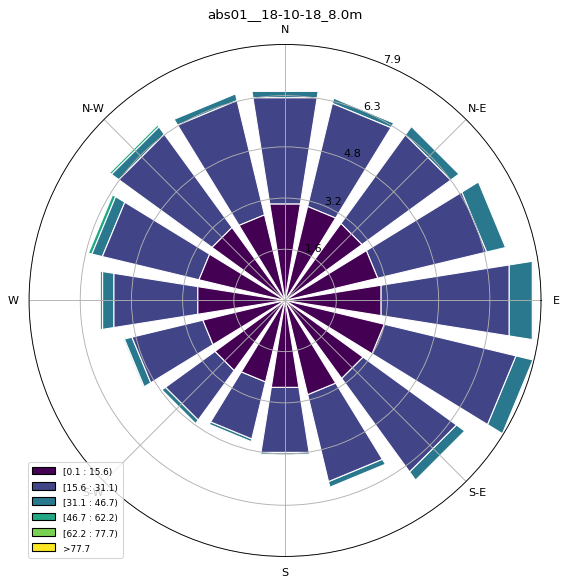

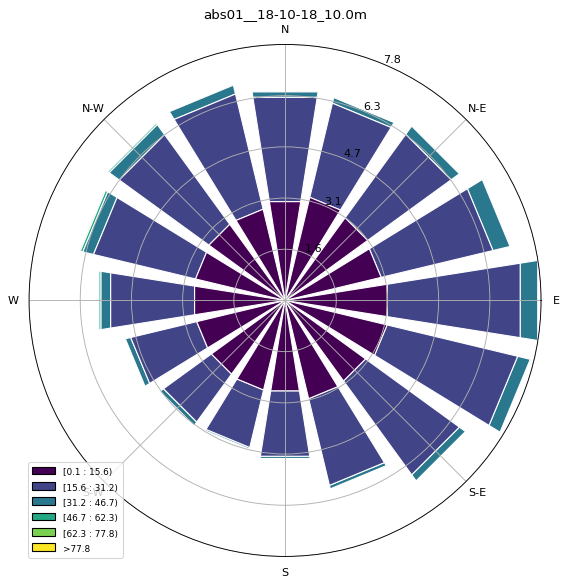

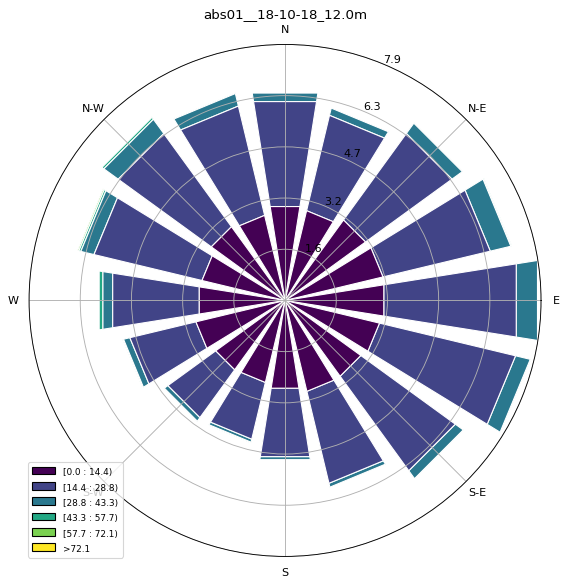

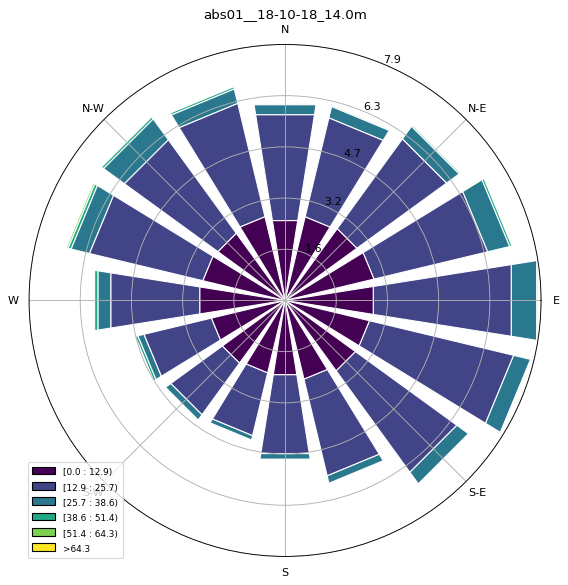

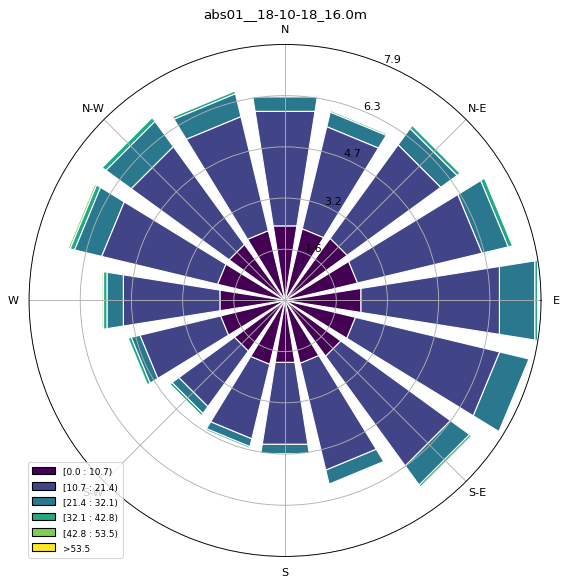

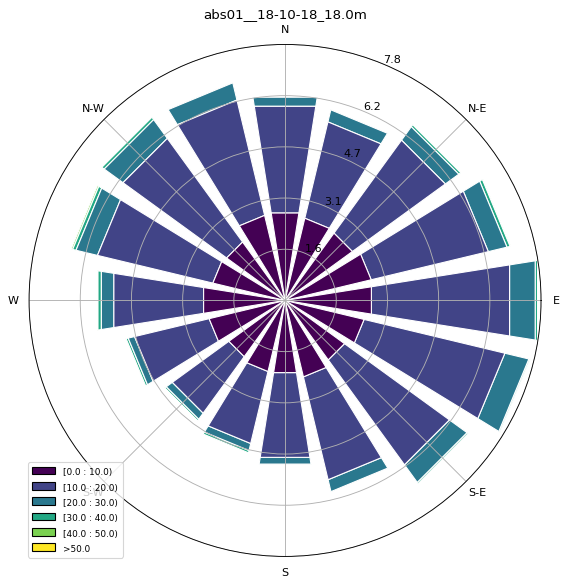

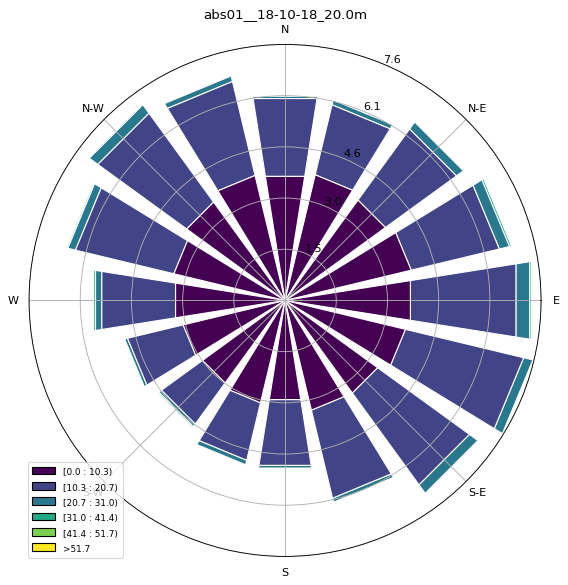

In [7]:
# Словарь для названий роз
keys = []
values = []
dicts = {}

def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

start = start_prov                         
stop = stop_prov                  
step = step_prov                            
i0=drange(start, stop, step)
for i in i0:
    keys.append(i)
    if i > 0 and i < 10:
        df_m = df1[[f'_{i}_m__Mod', f'_{i}_m__Dir']].values
    else:
        df_m = df1[[f'{i}_m__Mod', f'{i}_m__Dir']].values
    values.append(df_m)

for k in range(len(keys)):
    dicts[keys[k]] = values[k]

# Отрисовка роз
def roze(df_main): 

    # Таблица со скоростями, направлениями в градусах и направлениями 
    windDir = df_main[:,1]
    windSpd = df_main[:,0]
    windDir_degrees = []

    def degToCompass(num):
            val=int((num/22.5)+.5)
            arr=["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
            dir = arr[(val % 16)]
            windDir_degrees.append(dir)

    for num in windDir:
        degToCompass(num)

    windDir_degrees = np.array(windDir_degrees)
    final = pd.DataFrame({'windSpd': windSpd, 'windDir_degrees': windDir_degrees, 'windDir': windDir})
    
    def substring_after(s, delim):
        name1 = s.partition(delim)[2][:-4]
        return name1
    
    # Название ПАБС для названия картинки при сохранении
    file_name = substring_after(path, "parsed_measurements/") 
    
    # Название глубины для названия картинки при сохранении
    depth_keys = []
    depth_values = []
    i2=drange(start, stop, step)

    for p in i2:
        k = f"df_{p}m"
        depth_keys.append(k)

        vals = f"{p}m"
        depth_values.append(vals)

    depth_names = {}
    for j in range(len(depth_keys)):
        depth_names[depth_keys[j]] = depth_values[j]

    depth = depth_names[df_main_name]
        
    # Построение графика
    ax = WindroseAxes.from_ax()
    ax.bar(final['windDir'], final['windSpd'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    ax.set_title(f'{file_name}_{depth}', fontsize=12)
    #ax.figure.savefig(f'{file_name}_({depth})')      #сохранять по одной картинке
    save_image(f'{file_name}.pdf')                        #сохранять все картинки в одном файле

i1=drange(start, stop, step)
for d in i1:                             
    df_main = dicts[d]             
    df_main_name = f"df_{d}m" 
    roze(df_main)